In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, quantile
from numpy.random import randint, permutation

# Scalar Quantiles via Optimal Transport

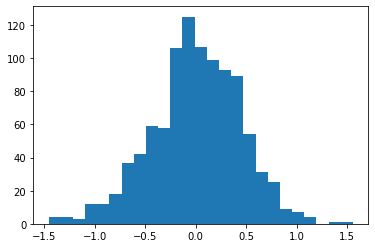

In [2]:
from vqr.data import generate_mvn_data

d = 1
k = 1
T = 50
N = 1000

X, Y = generate_mvn_data(N, d, k)

plt.hist(Y, 25);

In [3]:
from vqr.vqr import VectorQuantileRegressor

vqr = VectorQuantileRegressor(n_levels=T, solver_opts={'verbose': True})
vqr.fit(X, Y)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jul 27 03:50:16 PM: Your problem has 50000 variables, 3 constraints, and 0 parameters.
(CVXPY) Jul 27 03:50:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 27 03:50:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 27 03:50:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 27 03:50:16 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 27 03:50:16 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> C

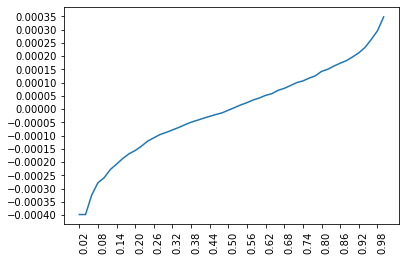

In [4]:
vqr.plot_quantiles();

# 2D Vector Quantiles

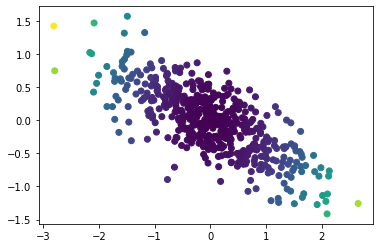

In [12]:
from vqr.data import generate_mvn_data

d = 2
k = 1
T = 25
N = 500

X, Y = generate_mvn_data(N, d, k, seed=42)
plt.scatter(Y[:, 0], Y[:, 1], c=np.sum(Y**2, axis=1))

In [6]:
from vqr.vqr import VectorQuantileRegressor

vqr = VectorQuantileRegressor(n_levels=T, solver_opts={'verbose': True})
vqr.fit(X, Y)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jul 27 03:50:18 PM: Your problem has 312500 variables, 3 constraints, and 0 parameters.
(CVXPY) Jul 27 03:50:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 27 03:50:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 27 03:50:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 27 03:50:18 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 27 03:50:18 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

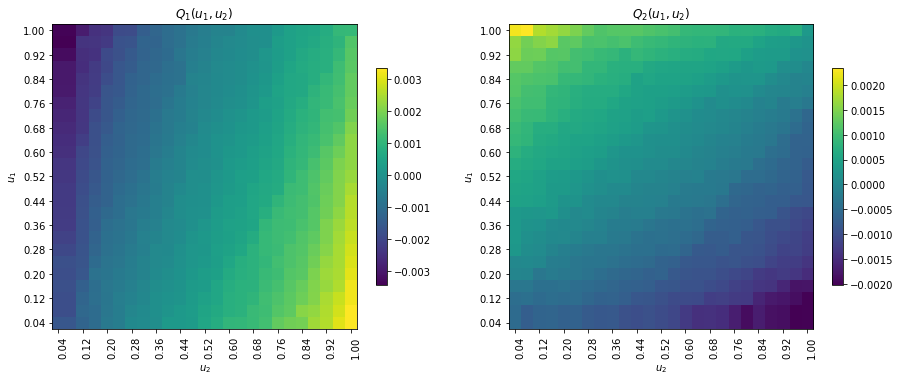

In [7]:
vqr.plot_quantiles(figsize=(15, 20));

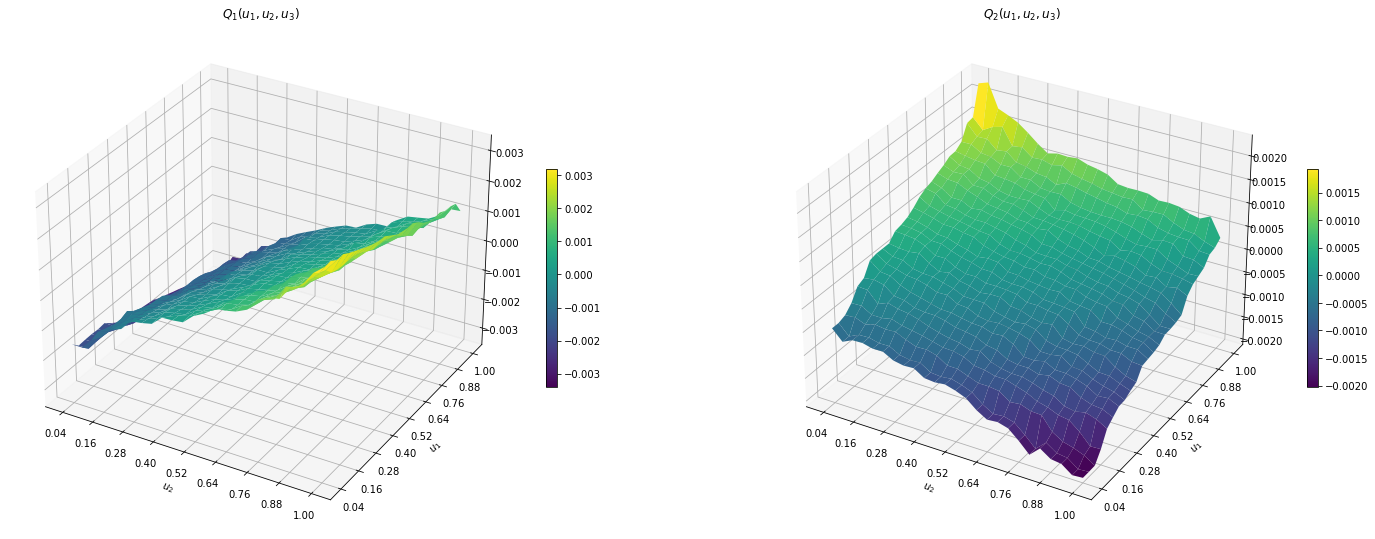

In [8]:
vqr.plot_quantiles_3d(figsize=(25, 20));

# 3D Vector Quantiles

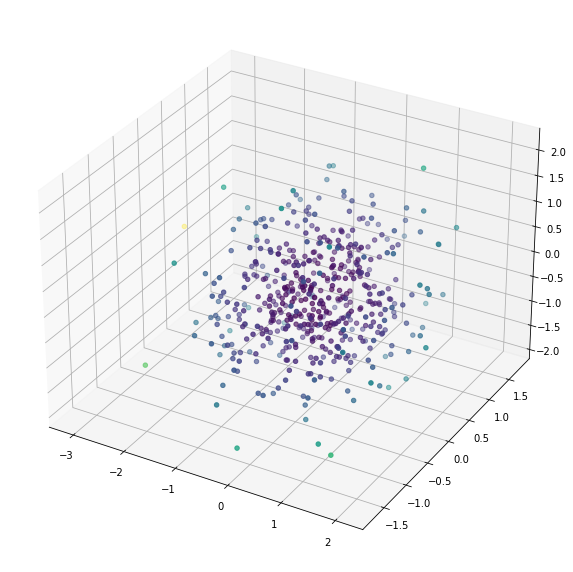

In [9]:
from vqr.data import generate_mvn_data

d = 3
k = 1
T = 10
N = 500

X, Y = generate_mvn_data(N, d, k)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))

In [10]:
from vqr.vqr import VectorQuantileRegressor

vqr = VectorQuantileRegressor(n_levels=T, solver_opts={'verbose': True})
vqr.fit(X, Y)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jul 27 03:50:33 PM: Your problem has 500000 variables, 3 constraints, and 0 parameters.
(CVXPY) Jul 27 03:50:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 27 03:50:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 27 03:50:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 27 03:50:33 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 27 03:50:33 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

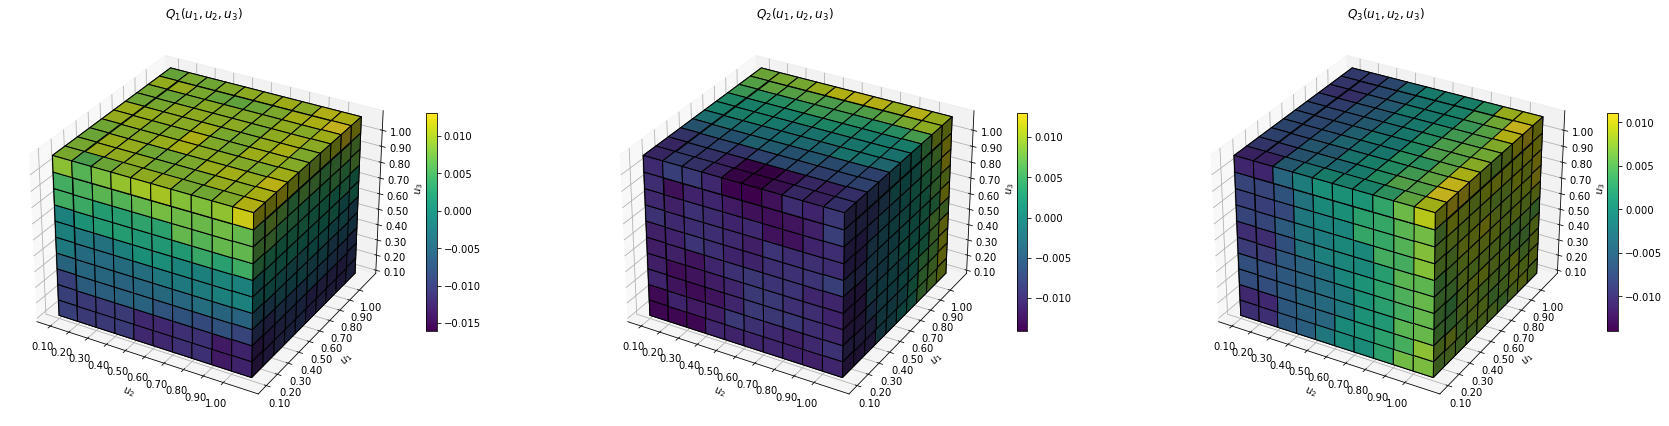

In [11]:
fig = vqr.plot_quantiles_3d(figsize=(30, 20))